In [358]:
import sklearn
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()

WRANGLING TRAIN_DATA

In [359]:
data = pd.read_csv('DATASETS/train_proj.csv')
work_data = data.fillna(method = 'bfill')

In [360]:
work_data = work_data.replace("3+",4)

In [361]:
work_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [362]:
work_data['Dependents'] = pd.to_numeric(work_data['Dependents'])

In [363]:
work_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [364]:
GenderMap = {
    "Male" : 1,
    "Female" : 0
}

MarriedMap = {
    "Yes" : 1,
    "No" : 0
}

EducationMap = {
    "Graduate" : 1,
    "Not Graduate" : 0
}

Self_EmployedMap = {
    "Yes" : 1,
    "No" : 0
}

Property_AreaMap = {
    "Rural" : 0,
    "Urban" : 1,
    "Semiurban" : 2
}

Loan_StatusMap = {
    "Y" : 1,
    "N": 0
}
work_data['Gender'] = work_data['Gender'].map(GenderMap)
work_data['Married'] = work_data['Married'].map(MarriedMap)
work_data['Self_Employed'] = work_data['Self_Employed'].map(Self_EmployedMap)
work_data['Property_Area'] = work_data['Property_Area'].map(Property_AreaMap)
work_data['Loan_Status'] = work_data['Loan_Status'].map(Loan_StatusMap)
work_data['Education'] = work_data['Education'].map(EducationMap)



work_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


In [365]:
work_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


C:\Users\Akhabue\anaconda3\envs\DATA_ANALYSIS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

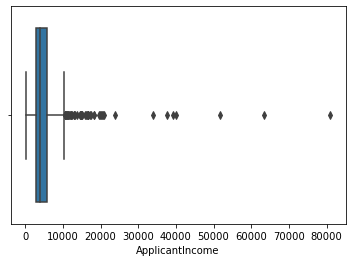

In [366]:
sns.boxplot(work_data.ApplicantIncome)

In [367]:
work_data = work_data[work_data.ApplicantIncome<=10000]

C:\Users\Akhabue\anaconda3\envs\DATA_ANALYSIS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

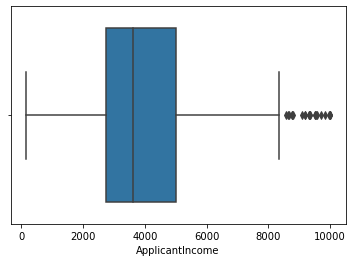

In [368]:
sns.boxplot(work_data.ApplicantIncome)

C:\Users\Akhabue\anaconda3\envs\DATA_ANALYSIS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

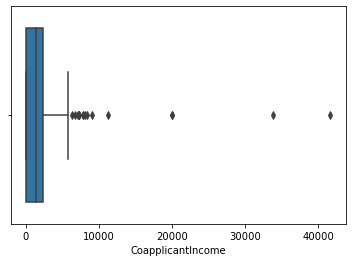

In [369]:
sns.boxplot(work_data.CoapplicantIncome)

In [370]:
work_data = work_data[work_data.CoapplicantIncome<=5000]

C:\Users\Akhabue\anaconda3\envs\DATA_ANALYSIS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

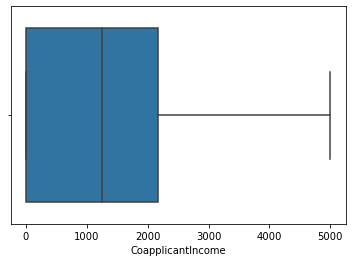

In [371]:
sns.boxplot(work_data.CoapplicantIncome)

In [372]:
work_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            535 non-null    object 
 1   Gender             535 non-null    int64  
 2   Married            535 non-null    int64  
 3   Dependents         535 non-null    int64  
 4   Education          535 non-null    int64  
 5   Self_Employed      535 non-null    int64  
 6   ApplicantIncome    535 non-null    int64  
 7   CoapplicantIncome  535 non-null    float64
 8   LoanAmount         535 non-null    float64
 9   Loan_Amount_Term   535 non-null    float64
 10  Credit_History     535 non-null    float64
 11  Property_Area      535 non-null    int64  
 12  Loan_Status        535 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 58.5+ KB


In [373]:
x = work_data.drop(['Loan_ID','Loan_Status','LoanAmount','Gender'], axis = 1)
y = work_data['Loan_Status']

In [374]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 535, dtype: int64

In [375]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.2)

<AxesSubplot:>

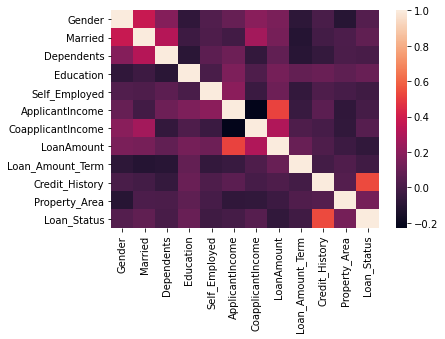

In [376]:
sns.heatmap(work_data.corr())

In [377]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix

In [378]:
model = LogisticRegression()

model.fit(x_train,y_train)
acc = model.score(x_test,y_test)
acc

C:\Users\Akhabue\anaconda3\envs\DATA_ANALYSIS\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8598130841121495

In [379]:
test = pd.read_csv('DATASETS/test_proj.csv')

In [380]:
test2 = test.drop(['Loan_ID','Gender','LoanAmount'], axis = 1)

In [381]:
test2['Married'] = test2['Married'].map(MarriedMap)
test2['Self_Employed'] = test2['Self_Employed'].map(Self_EmployedMap)
test2['Property_Area'] = test2['Property_Area'].map(Property_AreaMap)
test2['Education'] = test2['Education'].map(EducationMap)

In [382]:
test2 = test2.replace("3+",4)

In [383]:
test2 = test2.fillna(method = 'pad')

In [384]:
test2.isnull().sum()

Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [385]:
prediction = model.predict(test2)

In [386]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [396]:
list1 = list(test['Loan_ID'])

In [397]:
list2 = list(prediction)

In [398]:
Joint_list = list(zip(list1,list2))

In [399]:
Result_data =pd.DataFrame(Joint_list, columns = ['Loan_ID','Loan_Status'], index = None)

In [400]:
Result_data

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [401]:
Loan_StatusMap2 = {
   1 : "Y",
    0 : "N"
}
Result_data['Loan_Status'] = Result_data['Loan_Status'].map(Loan_StatusMap2)

In [402]:
Result_data

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [403]:
Result_data.to_csv(r'DATASETS\Result_data4.csv', index = False)